In [2]:
#%reset
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from num2words import num2words
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, KFold, RepeatedStratifiedKFold
from sklearn.metrics import f1_score, matthews_corrcoef, roc_auc_score

from sklearn.tree import DecisionTreeClassifier
oversample = RandomOverSampler(sampling_strategy = 0.5,random_state=10) #need for neural network and random forest


In [95]:
data_by_HSA = pd.read_csv('/Users/rem76/Documents/COVID_projections/hsa_time_data_all_dates.csv')
data_by_HSA['health_service_area_number']
data_by_HSA['health_service_area']
data_by_HSA = data_by_HSA.dropna(subset=['admits_weekly', 'deaths_weekly', 'cases_weekly', 'icu_weekly', 'beds_weekly'])
data_by_HSA['HSA_ID'] = data_by_HSA['health_service_area_number'].astype(str) + '' + data_by_HSA['health_service_area'].apply(lambda x: x.split()[0])
data_by_HSA['beds_over_15_100k'] = (data_by_HSA['beds_weekly'] > 15)*1

/var/folders/d4/chxwf4hs5kq7ttsp56s64z65mjk3qj/T/ipykernel_1614/1612634015.py:1: DtypeWarning: Columns (41,43,44,45,46,50,51) have mixed types. Specify dtype option on import or set low_memory=False.
  data_by_HSA = pd.read_csv('/Users/rem76/Documents/COVID_projections/hsa_time_data_all_dates.csv')


In [96]:
# need to redo dates 

for i, week in enumerate(data_by_HSA['date'].unique()):
    data_by_HSA.loc[data_by_HSA['date'] == week, 'week'] = i

In [131]:
missing_data_train_HSA =[2.2388059701492535, 1.9900497512437811, 2.2388059701492535, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.7412935323383085, 1.4925373134328357, 1.4925373134328357, 1.7412935323383085, 1.7412935323383085, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357]
missing_data_test_HSA =[0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 1.2437810945273633, 1.2437810945273633, 1.2437810945273633, 1.2437810945273633, 1.2437810945273633, 1.4925373134328357, 1.4925373134328357]

/var/folders/d4/chxwf4hs5kq7ttsp56s64z65mjk3qj/T/ipykernel_1614/2215657776.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(labels =np.array(range(0, 123, 10)), rotation = 0, fontsize=10)


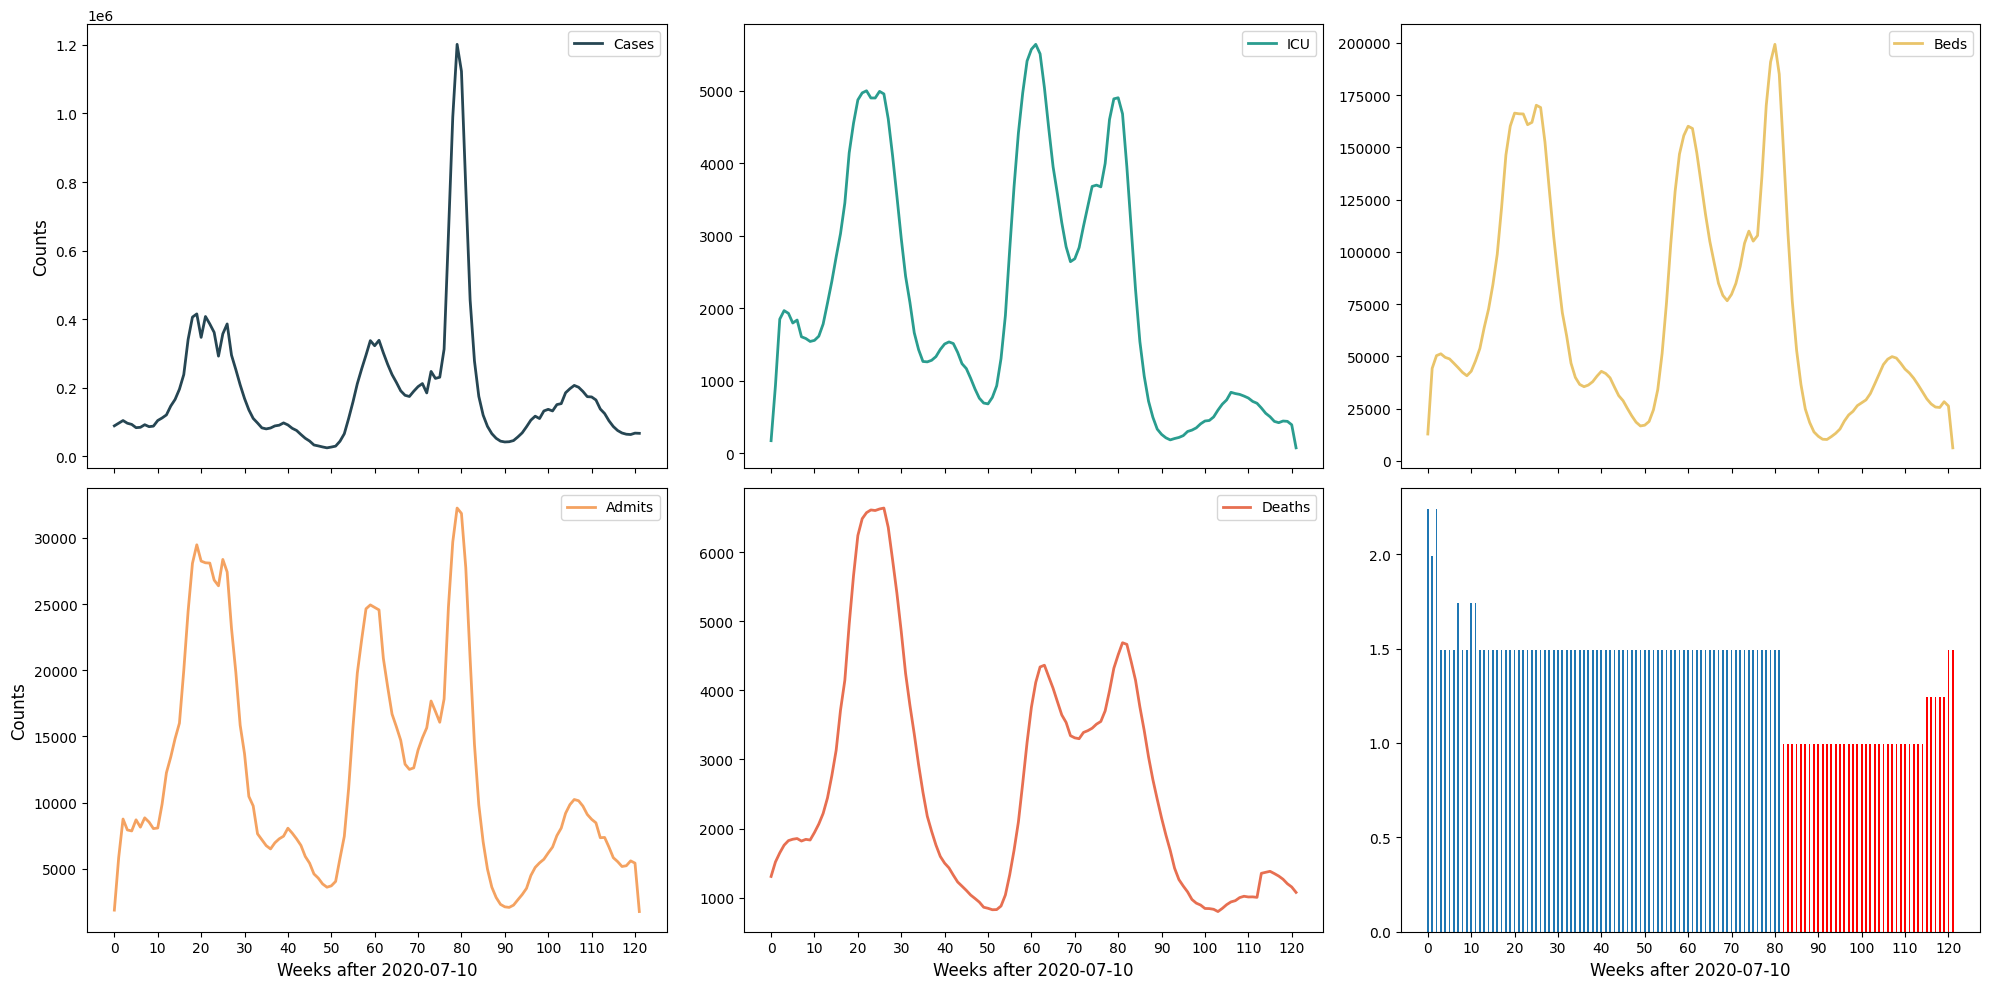

In [98]:
fig, axs = plt.subplots(2,3, figsize=(20, 10), facecolor='w', edgecolor='k', sharex='all')
axs = axs.ravel()

axs[0].set_ylabel("Counts", fontsize = 12)
axs[3].set_ylabel("Counts", fontsize = 12)
axs[1].set_ylabel("", fontsize = 12)
axs[2].set_ylabel("", fontsize = 12)
axs[4].set_ylabel("", fontsize = 12)
axs[5].set_ylabel("", fontsize = 12)
axs[3].set_xlabel("Weeks after 2020-07-10", fontsize = 12)
axs[4].set_xlabel("Weeks after 2020-07-10", fontsize = 12)
axs[5].set_xlabel("Weeks after 2020-07-10", fontsize = 12)

columns_to_plot = ['cases_weekly', 'icu_weekly', 'beds_weekly', 'admits_weekly', 'deaths_weekly', 'beds_over_15_100k']
labels = ['Cases', 'ICU', 'Beds', 'Admits', 'Deaths', 'Over_100k']
colours =['#264653', '#2a9d8f', '#e9c46a', '#f4a261', '#e76f51', 'red']
weekly_groups = data_by_HSA.groupby('week')
i = 0
width = 0.4
x = np.arange(len(missing_data_train_HSA) + len(missing_data_test_HSA))

#x_ticks_labels = np.concatenate((np.arange(len(missing_data_train_HSA), step=10), np.arange(len(missing_data_test_HSA), step=10)), axis=0)

for column in columns_to_plot:
        if column == 'beds_over_15_100k':
                axs[i].bar(x[:len(missing_data_train_HSA)], missing_data_train_HSA, width, label='Train')
                axs[i].bar(x[len(missing_data_train_HSA):], missing_data_test_HSA, width, label='Test', color='red')
                axs[i].set_xticklabels(labels =np.array(range(0, 123, 10)), rotation = 0, fontsize=10)
                axs[i].set_xticks(ticks =  np.array(range(0, 123, 10)), labels = np.array(range(0, 123, 10)), rotation = 0, fontsize=10)
                # Labels and title

        else:
                axs[i].plot(weekly_groups['week'].first(), weekly_groups[column].sum(), label = labels[i], color = colours[i], linewidth = 2)
                axs[i].legend()

                axs[i].set_xticklabels(labels =np.array(range(0, 123, 10)), rotation = 0, fontsize=10)
                axs[i].set_xticks(ticks =  np.array(range(0, 123, 10)), labels = np.array(range(0, 123, 10)), rotation = 0, fontsize=10)

                        

        i += 1

#plt.show()
fig.tight_layout()

plt.savefig('Graphs/Time_trends_July_2020_November_2022.png', dpi = 300)

In [37]:
np.arange(len(missing_data_train_HSA)//10, step=10)
np.arange(len(missing_data_train_HSA), step=10)

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80])

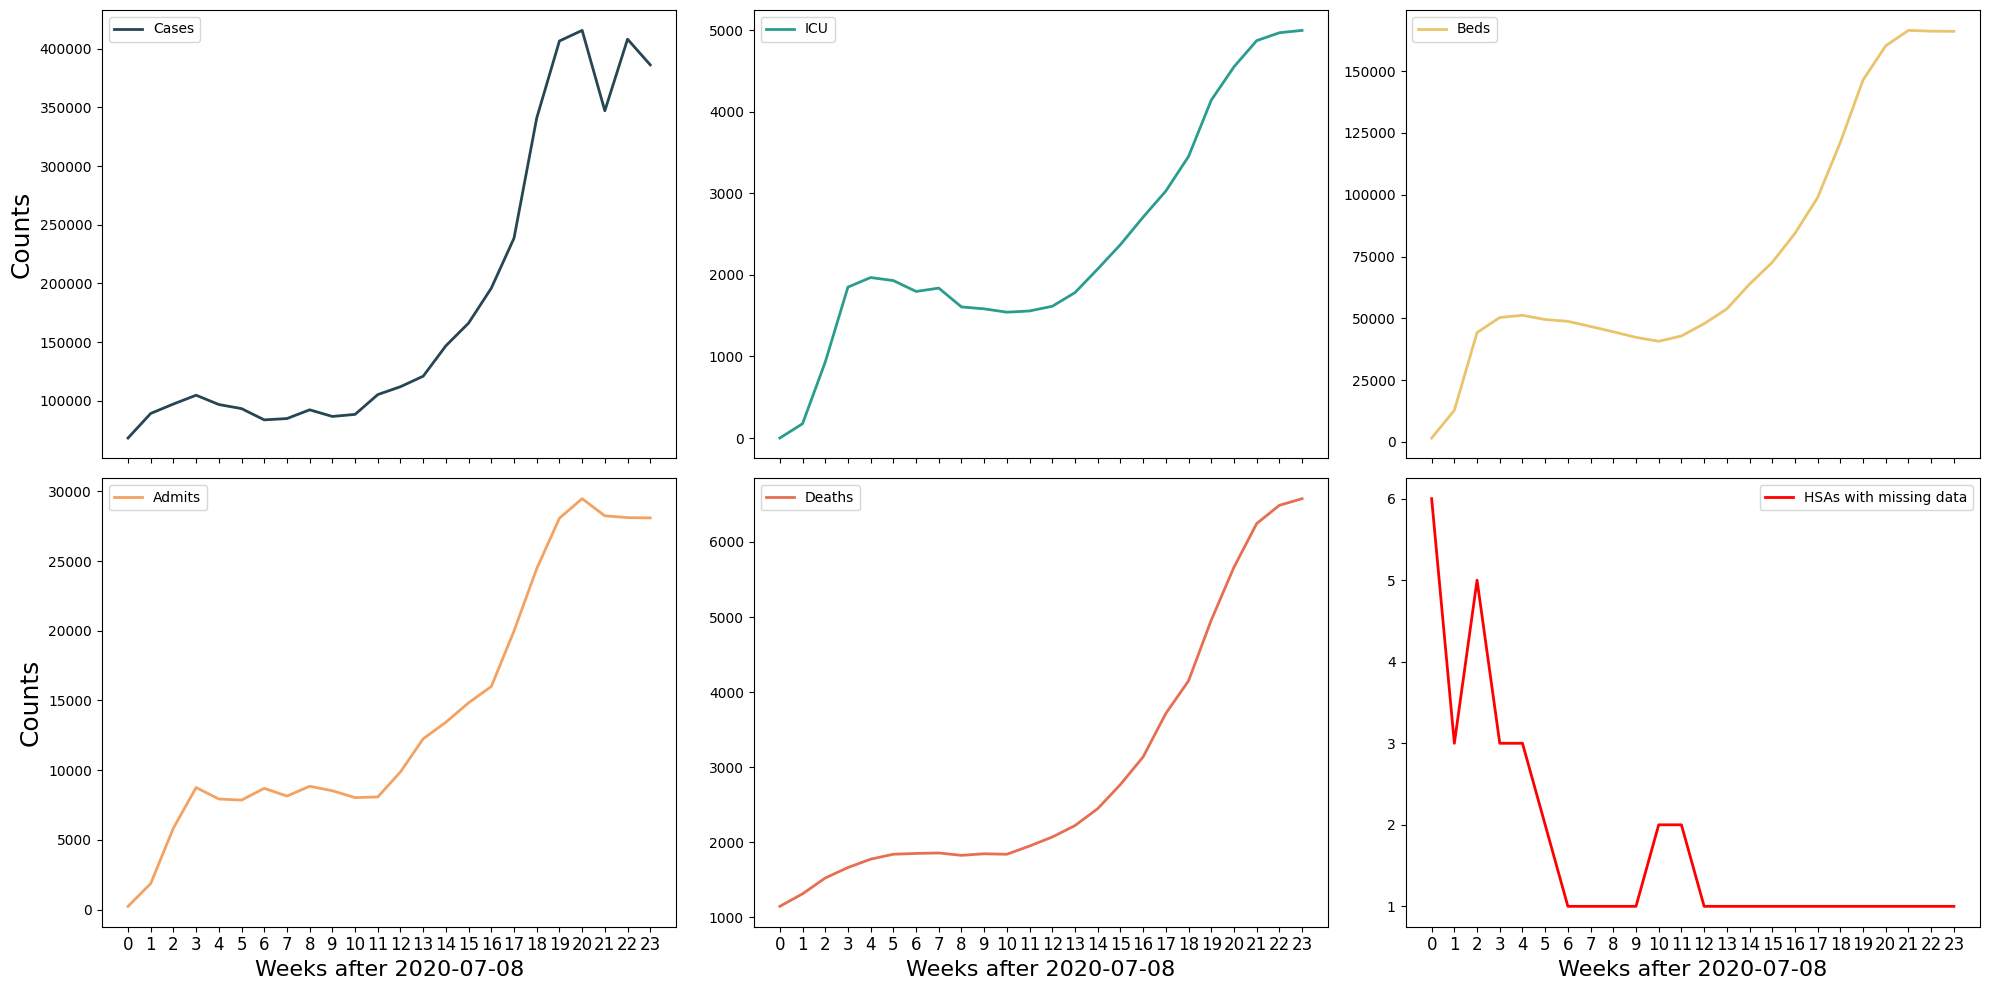

In [20]:
fig, axs = plt.subplots(2, 3, figsize=(20, 10), facecolor='w', edgecolor='k', sharex='all')
axs = axs.ravel()

axs[0].tick_params(axis='both', which='both', labelsize=10)
axs[1].tick_params(axis='both', which='both', labelsize=10)
axs[2].tick_params(axis='both', which='both', labelsize=10)
axs[3].tick_params(axis='both', which='both', labelsize=10)
axs[4].tick_params(axis='both', which='both', labelsize=10)
axs[5].tick_params(axis='both', which='both', labelsize=10)

columns_to_plot = ['cases_weekly', 'icu_weekly', 'beds_weekly', 'admits_weekly', 'deaths_weekly', 'beds_over_15_100k']
labels = ['Cases', 'ICU', 'Beds', 'Admits', 'Deaths', 'Over_100k']
colours =['#264653', '#2a9d8f', '#e9c46a', '#f4a261', '#e76f51', 'red']
weekly_groups = data_by_HSA.groupby('date')
i = 0

axs[0].set_ylabel("Counts", fontsize = 18)
axs[3].set_ylabel("Counts", fontsize = 18)
axs[3].set_xlabel("Weeks after 2020-07-08", fontsize = 16)
axs[4].set_xlabel("Weeks after 2020-07-08", fontsize = 16)
axs[5].set_xlabel("Weeks after 2020-07-08", fontsize = 16)
for column in columns_to_plot:
    if column == 'beds_over_15_100k':
        missing_data_counts = weekly_groups.apply(lambda x: x['beds_weekly'].isnull().sum())
        axs[i].plot(weekly_groups['date'].first(), missing_data_counts,
                    label='HSAs with missing data', color=colours[i], linewidth=2)
    else:
        axs[i].plot(weekly_groups['date'].first(), weekly_groups[column].sum(),
                    label=labels[i], color=colours[i], linewidth=2)

    axs[i].legend()

    axs[i].set_xticks(range(len(data_by_HSA['date'].unique())))
    axs[i].set_xticklabels(labels=range(len(data_by_HSA['date'].unique())), rotation=0, fontsize=12)

    i += 1
plt.tight_layout()

plt.savefig('Graphs/Time_trends_July_December.png', dpi = 300)

In [5]:
len(data_by_HSA['health_service_area'].unique())

804

In [6]:
804*0.97

779.88

# Plot based on counties 

In [3]:

data_by_county = pd.read_csv('/Users/rem76/Documents/COVID_projections/county_time_data_all_dates.csv')

data_by_county = data_by_county.dropna(subset=['admits_weekly', 'deaths_weekly', 'cases_weekly', 'icu_weekly', 'beds_weekly'])
data_by_county['CTYNAME'] = data_by_county['CTYNAME'].apply(lambda x: x.split()[0])
data_by_county['CTYNAME'] = data_by_county['fips'].astype(str) + '' + data_by_county['CTYNAME']
data_by_county['beds_over_15_100k'] = (data_by_county['beds_weekly'] > 15) * 1

# Redo dates
for i, week in enumerate(data_by_county['date'].unique()):
    data_by_county.loc[data_by_county['date'] == week, 'week'] = i

/var/folders/d4/chxwf4hs5kq7ttsp56s64z65mjk3qj/T/ipykernel_34603/828463747.py:1: DtypeWarning: Columns (47,48,49,50,51,55,56) have mixed types. Specify dtype option on import or set low_memory=False.
  data_by_county = pd.read_csv('/Users/rem76/Documents/COVID_projections/county_time_data_all_dates.csv')


/var/folders/d4/chxwf4hs5kq7ttsp56s64z65mjk3qj/T/ipykernel_34603/2509789909.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(labels=np.arange(0, len(x), 10), rotation=0, fontsize=10)


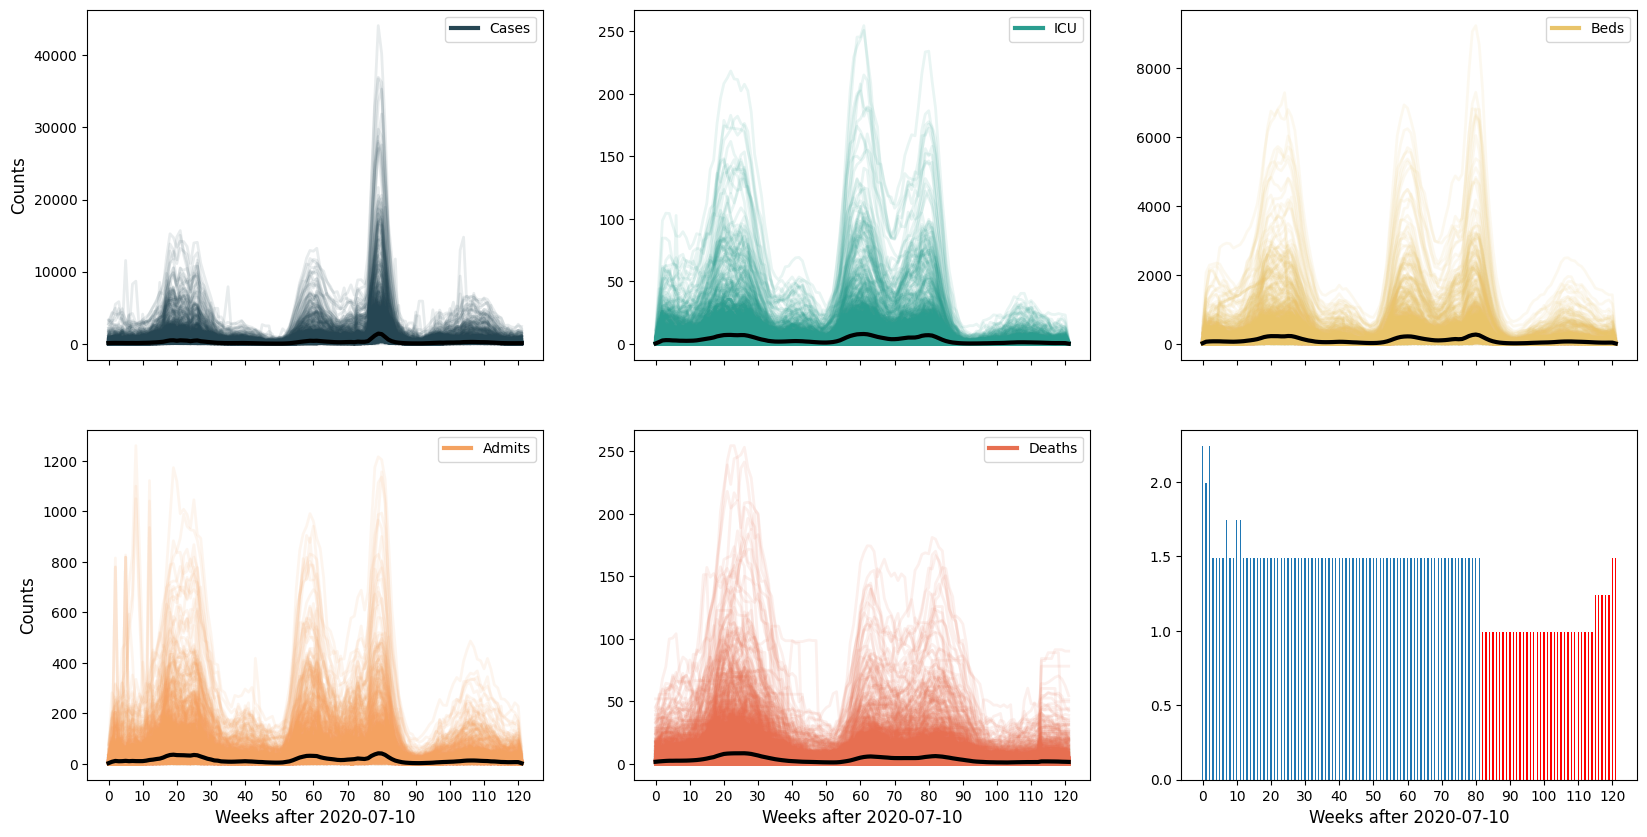

In [45]:
fig, axs = plt.subplots(2, 3, figsize=(20, 10), facecolor='w', edgecolor='k', sharex='all')
axs = axs.ravel()

axs[0].set_ylabel("Counts", fontsize=12)
axs[3].set_ylabel("Counts", fontsize=12)
axs[1].set_ylabel("", fontsize=12)
axs[2].set_ylabel("", fontsize=12)
axs[4].set_ylabel("", fontsize=12)
axs[5].set_ylabel("", fontsize=12)
axs[3].set_xlabel("Weeks after 2020-07-10", fontsize=12)
axs[4].set_xlabel("Weeks after 2020-07-10", fontsize=12)
axs[5].set_xlabel("Weeks after 2020-07-10", fontsize=12)
weekly_county_groups = data_by_county.groupby(['week'])  # Group by county and week

columns_to_plot = ['cases_weekly', 'icu_weekly', 'beds_weekly', 'admits_weekly', 'deaths_weekly', 'beds_over_15_100k']
labels = ['Cases', 'ICU', 'Beds', 'Admits', 'Deaths', 'Over_100k']
colours =['#264653', '#2a9d8f', '#e9c46a', '#f4a261', '#e76f51', 'red']
i = 0
missing_data_train_county =[2.2388059701492535, 1.9900497512437811, 2.2388059701492535, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.7412935323383085, 1.4925373134328357, 1.4925373134328357, 1.7412935323383085, 1.7412935323383085, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357]
missing_data_test_county =[0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 1.2437810945273633, 1.2437810945273633, 1.2437810945273633, 1.2437810945273633, 1.2437810945273633, 1.4925373134328357, 1.4925373134328357]
weekly_county_groups = data_by_county.groupby(['week'])  # Group by county and week
i = 0
width = 0.4
high_icu = []
high_cases = []
high_beds = []
high_admits = []
high_deaths = []
percentiles_dict = {}
average_data_dict = {}
x = np.arange(len(weekly_county_groups))
for column in columns_to_plot:
    if column == 'beds_over_15_100k':
        axs[i].bar(x[:len(missing_data_train_county)], missing_data_train_county, width, label='Train')
        axs[i].bar(x[len(missing_data_train_county):], missing_data_test_county, width, label='Test', color='red')
        axs[i].set_xticklabels(labels=np.arange(0, len(x), 10), rotation=0, fontsize=10)
        axs[i].set_xticks(np.arange(0, len(x), 10))
    else:

        for county in data_by_county['county'].unique():
            county_data = data_by_county[data_by_county['county'] == county]
            county_data_weekly = county_data.groupby(['week'])
            axs[i].plot(county_data_weekly['week'].first(), county_data_weekly[column].sum(), color=colours[i], linewidth=2, alpha=0.1)
            sum_value = county_data_weekly[column].sum()
            if column == 'cases_weekly':
                if sum_value.gt(10000).any():
                    high_cases.append(county)

            elif column == 'icu_weekly':
                if sum_value.gt(50).any():
                    high_icu.append(county) 

            elif column == 'beds_weekly':
                if sum_value.gt(2000).any():
                    high_beds.append(county)   

            elif column == 'admits_weekly':
                if sum_value.gt(200).any():
                    high_admits.append(county)   
     
            elif column == 'deaths_weekly':
                if sum_value.gt(150).any():
                    high_deaths.append(county)  
       
        # Calculate and plot the average
        percentiles = county_data_weekly[column].quantile([0.25, 0.5, 0.75])
        percentiles_dict[column] = percentiles.transpose().values.tolist()

        average_data = data_by_county.groupby('week')[column].mean()
        average_data_dict[column] = average_data
        axs[i].plot(average_data.index, average_data,  color=colours[i],  label=labels[i], linewidth=3)
        percentiles_dict[column] = percentiles.values.tolist()
        axs[i].plot(average_data.index, average_data, color='black', linewidth=3)
        axs[i].legend()

    i += 1

plt.savefig('Graphs/Time_trends_July_December_by_county.png', dpi = 300)

/var/folders/d4/chxwf4hs5kq7ttsp56s64z65mjk3qj/T/ipykernel_34603/4188757653.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(labels=np.arange(0, len(x), 10), rotation=0, fontsize=10)


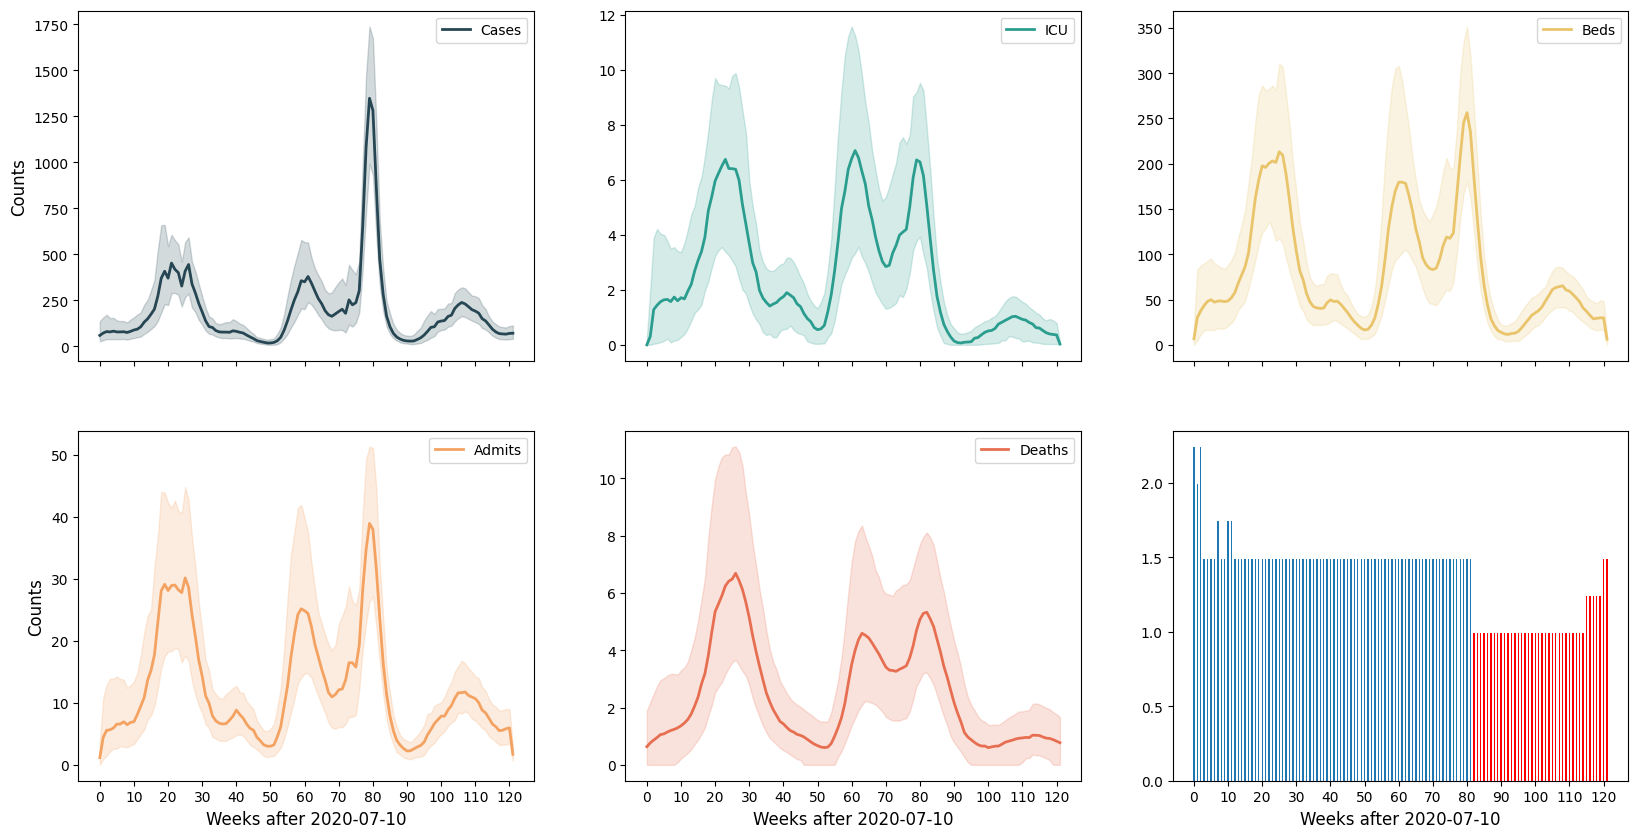

In [43]:
fig, axs = plt.subplots(2, 3, figsize=(20, 10), facecolor='w', edgecolor='k', sharex='all')
axs = axs.ravel()

axs[0].set_ylabel("Counts", fontsize=12)
axs[3].set_ylabel("Counts", fontsize=12)
axs[1].set_ylabel("", fontsize=12)
axs[2].set_ylabel("", fontsize=12)
axs[4].set_ylabel("", fontsize=12)
axs[5].set_ylabel("", fontsize=12)
axs[3].set_xlabel("Weeks after 2020-07-10", fontsize=12)
axs[4].set_xlabel("Weeks after 2020-07-10", fontsize=12)
axs[5].set_xlabel("Weeks after 2020-07-10", fontsize=12)
weekly_county_groups = data_by_county.groupby(['week'])  # Group by county and week

columns_to_plot = ['cases_weekly', 'icu_weekly', 'beds_weekly', 'admits_weekly', 'deaths_weekly', 'beds_over_15_100k']
labels = ['Cases', 'ICU', 'Beds', 'Admits', 'Deaths', 'Over_100k']
colours =['#264653', '#2a9d8f', '#e9c46a', '#f4a261', '#e76f51', 'red']
i = 0
missing_data_train_county =[2.2388059701492535, 1.9900497512437811, 2.2388059701492535, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.7412935323383085, 1.4925373134328357, 1.4925373134328357, 1.7412935323383085, 1.7412935323383085, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357]
missing_data_test_county =[0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 1.2437810945273633, 1.2437810945273633, 1.2437810945273633, 1.2437810945273633, 1.2437810945273633, 1.4925373134328357, 1.4925373134328357]
weekly_county_groups = data_by_county.groupby(['week'])  # Group by county and week
i = 0
width = 0.4

percentiles_dict = {}
average_data_dict = {}
x = np.arange(len(weekly_county_groups))
percentiles_dict = {}
average_data_dict = {}
for column in columns_to_plot:
    if column == 'beds_over_15_100k':
        axs[i].bar(x[:len(missing_data_train_county)], missing_data_train_county, width, label='Train')
        axs[i].bar(x[len(missing_data_train_county):], missing_data_test_county, width, label='Test', color='red')
        axs[i].set_xticklabels(labels=np.arange(0, len(x), 10), rotation=0, fontsize=10)
        axs[i].set_xticks(np.arange(0, len(x), 10))
    else:

        # Calculate percentiles for each week
        percentiles = data_by_county.groupby('week')[column].quantile([0.25, 0.5, 0.75])
        percentiles_dict[column] = percentiles.unstack(level=-1).values.tolist()

        # Plot median and IQR
        axs[i].plot(range(len(percentiles.loc[:, 0.5])), percentiles.loc[:, 0.5], color=colours[i],label=labels[i],linewidth=2)
        axs[i].fill_between(range(len(percentiles.loc[:, 0.5])), percentiles.loc[:, 0.25], percentiles.loc[:, 0.75], alpha=0.2, color=colours[i])

        axs[i].legend()

    i += 1


plt.savefig('Graphs/Time_trends_July_December_by_county_IQ_range.png', dpi = 300)



In [12]:
high_deaths
print(len(high_icu))
print(len(high_admits))
print(len(high_beds))
print(len(high_cases))

171
94
214
69
61


In [53]:
data_by_county = pd.read_csv('/Users/rem76/Documents/COVID_projections/county_time_data_all_dates.csv')

data_by_county['CTYNAME_first'] = data_by_county['CTYNAME'].apply(lambda x: x.split()[0])

/var/folders/d4/chxwf4hs5kq7ttsp56s64z65mjk3qj/T/ipykernel_34603/4114543107.py:1: DtypeWarning: Columns (47,48,49,50,51,55,56) have mixed types. Specify dtype option on import or set low_memory=False.
  data_by_county = pd.read_csv('/Users/rem76/Documents/COVID_projections/county_time_data_all_dates.csv')


In [68]:
len(high_icu)

94

Counter({'STNAME': 1, 'CTYNAME_first': 1})

In [75]:
from collections import Counter
subset_states = data_by_county.loc[data_by_county['CTYNAME_first'].isin(high_icu), ['STNAME', 'CTYNAME_first']]
subset_states.drop_duplicates(subset='CTYNAME_first', inplace=True)
Counter(subset_states['STNAME'])

Counter({'Alabama': 30,
         'Arkansas': 19,
         'California': 2,
         'Colorado': 2,
         'Florida': 4,
         'Georgia': 9,
         'Idaho': 1,
         'Illinois': 10,
         'Indiana': 4,
         'Kansas': 4,
         'Kentucky': 3,
         'Louisiana': 1,
         'North Carolina': 1,
         'Ohio': 1,
         'Pennsylvania': 1,
         'Texas': 1})

In [76]:
subset_states = data_by_county.loc[data_by_county['CTYNAME_first'].isin(high_deaths), ['STNAME', 'CTYNAME_first']]
subset_states.drop_duplicates(subset='CTYNAME_first', inplace=True)
Counter(subset_states['STNAME'])

Counter({'Alabama': 34,
         'Arkansas': 21,
         'California': 2,
         'Colorado': 7,
         'Florida': 4,
         'Georgia': 18,
         'Idaho': 2,
         'Illinois': 13,
         'Indiana': 3,
         'Iowa': 5,
         'Kansas': 12,
         'Kentucky': 6,
         'Louisiana': 1,
         'Michigan': 4,
         'Minnesota': 2,
         'Montana': 2,
         'Nebraska': 5,
         'North Carolina': 1,
         'North Dakota': 4,
         'Oklahoma': 1,
         'Pennsylvania': 2,
         'South Dakota': 9,
         'Tennessee': 1,
         'Texas': 6})

In [77]:
subset_states = data_by_county.loc[data_by_county['CTYNAME_first'].isin(high_admits), ['STNAME', 'CTYNAME_first']]
subset_states.drop_duplicates(subset='CTYNAME_first', inplace=True)
Counter(subset_states['STNAME'])

Counter({'Alabama': 33,
         'Arizona': 1,
         'Arkansas': 27,
         'California': 2,
         'Colorado': 6,
         'Connecticut': 1,
         'Delaware': 2,
         'Florida': 5,
         'Georgia': 24,
         'Idaho': 4,
         'Illinois': 14,
         'Indiana': 6,
         'Iowa': 3,
         'Kansas': 27,
         'Kentucky': 18,
         'Louisiana': 2,
         'Missouri': 1,
         'Montana': 6,
         'Nebraska': 6,
         'New York': 1,
         'Ohio': 1,
         'Oklahoma': 5,
         'Texas': 10,
         'Wisconsin': 2})

In [78]:
subset_states = data_by_county.loc[data_by_county['CTYNAME_first'].isin(high_beds), ['STNAME', 'CTYNAME_first']]
subset_states.drop_duplicates(subset='CTYNAME_first', inplace=True)
Counter(subset_states['STNAME'])

Counter({'Alabama': 23,
         'Arkansas': 19,
         'California': 2,
         'Colorado': 2,
         'Florida': 4,
         'Georgia': 5,
         'Illinois': 7,
         'Indiana': 1,
         'Kansas': 2,
         'Kentucky': 1,
         'Louisiana': 1})

In [79]:
subset_states = data_by_county.loc[data_by_county['CTYNAME_first'].isin(high_cases), ['STNAME', 'CTYNAME_first']]
subset_states.drop_duplicates(subset='CTYNAME_first', inplace=True)
Counter(subset_states['STNAME'])

Counter({'Alabama': 23,
         'Arkansas': 16,
         'California': 2,
         'Colorado': 2,
         'Florida': 2,
         'Georgia': 4,
         'Idaho': 1,
         'Illinois': 7,
         'Indiana': 2,
         'Oklahoma': 1,
         'Texas': 1})